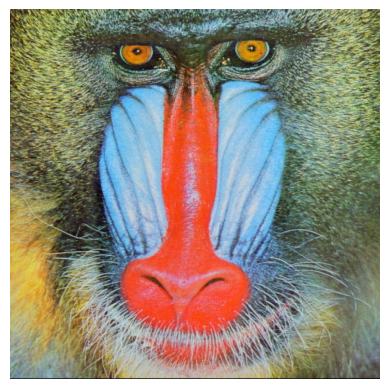

In [32]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
image1 = cv2.imread('HamletContainer.png')
image = image1;
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
height, width, channels = image1.shape
plt.imshow(image1) 
plt.axis('off')
plt.show()

In [33]:
message = ""
file_path = '../hamlet.txt'
# Open and read the file
with open(file_path, 'r') as file:
    message = file.read()

def text_to_binary(message):
    return ''.join(format(ord(char), '08b') for char in message)
binMessage = text_to_binary(message)
print(binMessage)

0101010001101000011001010010000001010000011100100110111101101010011001010110001101110100001000000100011101110101011101000110010101101110011000100110010101110010011001110010000001100101010000100110111101101111011010110010000001101111011001100010000001001000011000010110110101101100011001010111010000001010001000000010000000100000001000000000101001010100011010000110100101110011001000000110010101100010011011110110111101101011001000000110100101110011001000000110011001101111011100100010000001110100011010000110010100100000011101010111001101100101001000000110111101100110001000000110000101101110011110010110111101101110011001010010000001100001011011100111100101110111011010000110010101110010011001010010000001101001011011100010000001110100011010000110010100100000010101010110111001101001011101000110010101100100001000000101001101110100011000010111010001100101011100110010000001100001011011100110010000001010011011010110111101110011011101000010000001101111011101000110100001100101011100100010000001110000

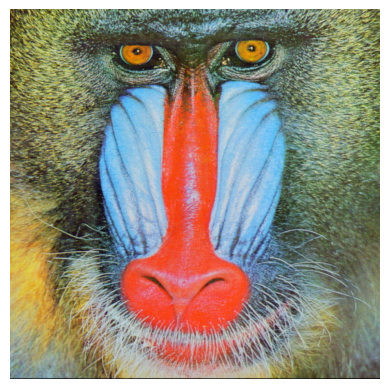

In [34]:
def embedMessageInImage(image, message):
    index = 0
    message += "".zfill(8)
    if(len(message) > height*width*channels):
        print("Impossible to embed the message")
    for x in range(width):
        for y in range(height):
            pixel = image[y, x]
            for channel in range(channels):
                if(index < len(message)):
                    pixel[channel] = pixel[channel] & ~1 | int(message[index])
                    index += 1
    return image
image1 = embedMessageInImage(image1, binMessage)
cv2.imwrite('Untitled2.png', image1)
plt.imshow(image1) 
plt.axis('off')
plt.show()


Message hidden successfully.


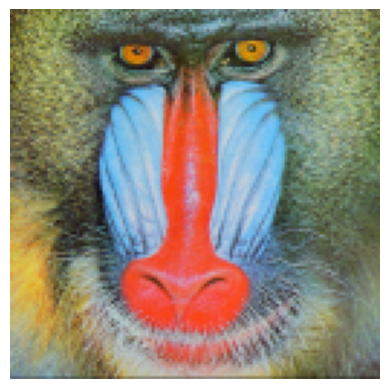

In [107]:
from PIL import Image
def hide_text_in_image(input_image_path, message):
    try:
        # Open the image
        image = Image.open(input_image_path)

        # Convert the message to binary
        binary_message = ''.join(format(ord(char), '08b') for char in message)

        if len(binary_message) > (image.width * image.height * 3):
            raise ValueError("Message is too large to hide in the image")

        data_index = 0

        # Iterate through the image pixels
        for x in range(image.width):
            for y in range(image.height):
                pixel = list(image.getpixel((x, y)))

                # Iterate through the RGB channels (3 channels per pixel)
                for color_channel in range(3):
                    if data_index < len(binary_message):
                        pixel[color_channel] = pixel[color_channel] & ~1 | int(binary_message[data_index])
                        data_index += 1

                image.putpixel((x, y), tuple(pixel))

        # Save the modified image with the hidden message
        image.save("Untitled3.png")
        print("Message hidden successfully.")
        return image
    except Exception as e:
        print(f"Error: {e}")
        
image2 = hide_text_in_image('Untitled.png', "hello")
plt.imshow(image2) 
plt.axis('off')
plt.show()

In [35]:
def extract_message(image):
    index = 0
    message = ""
    char = ""
    message_retrieved = False
    for x in range(width):
        if(message_retrieved): 
            break
        for y in range(height):
            pixel = image[y, x]
            for channel in range(channels):
                LSB = bin(pixel[channel])[2:].zfill(8)[7]
                char += LSB
                if len(char) % 8 == 0:
                    newChar = chr(int(char, 2))
                    char = ""
                    if(newChar == '\0'):
                        print("message retrieved")
                        return message
                    else:
                        message += newChar
extract_message(image1)
                    

message retrieved


'The Project Gutenberg eBook of Hamlet\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: Hamlet\n\n\nAuthor: William Shakespeare\n\nRelease date: June 1, 1999 [eBook #1787]\n                Most recently updated: May 24, 2019\n\nLanguage: English\n\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK HAMLET ***\nThis etext is a typo-corrected version of Shakespeare\'s Hamlet,\nProject Gutenberg file 1ws2610.txt.\n\n\n*******************************************************************\nTHIS EBOOK WAS ONE OF PROJECT GUTENBERG\'S EARLY FILES PRODUCED AT A\nTIME WHEN PROOFING METHODS AND 

In [109]:
def compare(image1, image2):
    for y in range(height):
            for x in range(width):
                pixel1 = image1[y, x]
                pixel2 = list(image2.getpixel((x, y)))
                pixel1 = np.array(pixel1)
                pixel2 = np.array(pixel2[:3])
                if(not(np.array_equal(pixel1, pixel2))):
                    return False
    return True
compare(image1, image2)

True